In [ ]:
# Import required libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_excel("Data/SourceData.xlsx")

In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0,3,11000.0,1164.770591,100.302262,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.00,0,12,1200.0,1083.301007,2172.697765,0.000000,12


In [ ]:
df.dropna(inplace=True)

**Factor analysis** is a linear statistical model. It is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms (Source). Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.

Factorability means "can we find the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:



*   Bartlett’s Test
*   Kaiser-Meyer-Olkin Test




In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=(calculate_bartlett_sphericity(df))
chi_square_value, p_value

(168083.73666450314, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=(calculate_kmo(df))
kmo_model

0.6408399347874469

In [ ]:
df.drop(['CUST_ID'],axis=1,inplace=True)

** Eigenvalues** :-  Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

In [ ]:
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()

The graphical approach is based on the visual representation of factors' eigenvalues also called **scree plot**. This scree plot helps us to determine the number of factors where the curve makes an elbow.

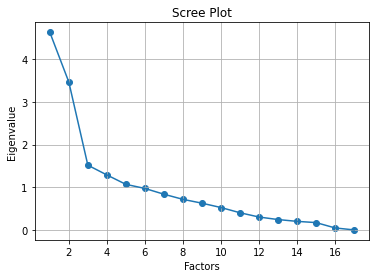

In [ ]:
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

**Factor Extraction:** In this step, the number of factors and approach for extraction selected using variance partitioning methods such as principal components analysis and common factor analysis.


**Factor Rotation:** In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.

In [ ]:
fa = FactorAnalyzer(rotation="varimax", n_factors=5)
fa.fit(df)

# Check loadings
loadings = pd.DataFrame(fa.loadings_)
loadings.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
loadings.index = df.columns
loadings

,Factor-1,Factor-2,Factor-3,Factor-4,Factor-5
BALANCE,0.158494,0.357337,-0.077299,0.920319,0.069783
BALANCE_FREQUENCY,0.009122,0.135823,0.196383,0.300152,0.225552
PURCHASES,0.953176,-0.109918,0.228134,0.085697,0.141708
ONEOFF_PURCHASES,0.819476,-0.075849,0.020714,0.034082,0.290779
INSTALLMENTS_PURCHASES,0.529791,-0.087449,0.494839,0.150570,-0.094082
CASH_ADVANCE,0.108847,0.749907,-0.111702,0.218904,-0.084781
PURCHASES_FREQUENCY,0.141776,-0.170082,0.852297,-0.011948,0.360058
ONEOFF_PURCHASES_FREQUENCY,0.376831,-0.078242,0.157089,0.008472,0.821742
PURCHASES_INSTALLMENTS_FREQUENCY,0.092201,-0.130160,0.955210,0.038065,-0.032758
CASH_ADVANCE_FREQUENCY,-0.054940,0.835687,-0.158591,0.159673,0.018662


Now we can start naming the segments based on the features that are within each factor. 

In [ ]:
segments = loadings[loadings >= .4].fillna(loadings[loadings <= -.4])
segments

,Factor-1,Factor-2,Factor-3,Factor-4,Factor-5
BALANCE,NaN,NaN,NaN,0.920319,NaN
BALANCE_FREQUENCY,NaN,NaN,NaN,NaN,NaN
PURCHASES,0.953176,NaN,NaN,NaN,NaN
ONEOFF_PURCHASES,0.819476,NaN,NaN,NaN,NaN
INSTALLMENTS_PURCHASES,0.529791,NaN,0.494839,NaN,NaN
CASH_ADVANCE,NaN,0.749907,NaN,NaN,NaN
PURCHASES_FREQUENCY,NaN,NaN,0.852297,NaN,NaN
ONEOFF_PURCHASES_FREQUENCY,NaN,NaN,NaN,NaN,0.821742
PURCHASES_INSTALLMENTS_FREQUENCY,NaN,NaN,0.955210,NaN,NaN
CASH_ADVANCE_FREQUENCY,NaN,0.835687,NaN,NaN,NaN


In [ ]:
segment_names = ['PURCHASES', 'CASH ADVANCE', 'INSTALLMENTS', 'BALANCE', 'ON-OFF PURCHASE FREQUENCY']
segments.columns = segment_names
segments

,PURCHASES,CASH ADVANCE,INSTALLMENTS,BALANCE,ON-OFF PURCHASE FREQUENCY
BALANCE,NaN,NaN,NaN,0.920319,NaN
BALANCE_FREQUENCY,NaN,NaN,NaN,NaN,NaN
PURCHASES,0.953176,NaN,NaN,NaN,NaN
ONEOFF_PURCHASES,0.819476,NaN,NaN,NaN,NaN
INSTALLMENTS_PURCHASES,0.529791,NaN,0.494839,NaN,NaN
CASH_ADVANCE,NaN,0.749907,NaN,NaN,NaN
PURCHASES_FREQUENCY,NaN,NaN,0.852297,NaN,NaN
ONEOFF_PURCHASES_FREQUENCY,NaN,NaN,NaN,NaN,0.821742
PURCHASES_INSTALLMENTS_FREQUENCY,NaN,NaN,0.955210,NaN,NaN
CASH_ADVANCE_FREQUENCY,NaN,0.835687,NaN,NaN,NaN


In [ ]:
# Check variance
factorVariance = pd.DataFrame(fa.get_factor_variance())
factorVariance.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
factorVariance.index = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
factorVariance

,Factor-1,Factor-2,Factor-3,Factor-4,Factor-5
SS Loadings,3.059893,2.413901,2.359234,1.491973,1.079432
Proportion Variance,0.179994,0.141994,0.138778,0.087763,0.063496
Cumulative Variance,0.179994,0.321988,0.460766,0.548529,0.612025
